In [93]:
import matplotlib.pyplot as plt 
%matplotlib inline

In [1]:
import Genetic_Algorithm as ga
import random

In [2]:
def calculate_fitness(data):  #change the value as per as need
    sum_val = 0
    for i,j in enumerate(reversed(data)):
        sum_val += (2**i)*j
    return sum_val

def population_generation(size, nos_pop): 
    return [random.choices([0,1], k=size) for _ in range(nos_pop)]

In [3]:
SIZE = 10    #Size of each population
POP = 12    #Population in each batch
NOS_TOP = 4 #Number of top selected population per population
ITERATION = 50 #Number of Iteration 

In [4]:
genetic_algo = ga.GeneticAlgorithm(SIZE, POP, NOS_TOP, population_generation, calculate_fitness)


Population Class Initialised
Selection Initialised
Crossover Class Initialised
Mutaion Initialised
Plotting Initialised


In [5]:
genetic_algo.train(10)

Trainig Over


No handles with labels found to put in legend.


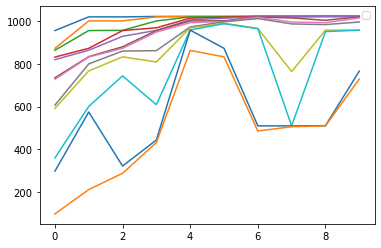

In [6]:
genetic_algo.display()

In [7]:
genetic_algo.population

[[1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 0, 1, 1, 1, 1, 1, 0, 1],
 [1, 1, 1, 0, 1, 1, 0, 1, 0, 0],
 [1, 1, 1, 1, 1, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 1, 1, 1, 1],
 [0, 1, 1, 1, 1, 1, 1, 1, 1, 1],
 [1, 1, 1, 0, 1, 1, 1, 1, 1, 0],
 [1, 1, 1, 0, 1, 1, 1, 1, 1, 0]]

In [9]:
genetic_algo.population[0:2]

[[1, 1, 1, 1, 1, 0, 0, 1, 1, 0], [1, 1, 1, 1, 1, 0, 1, 0, 1, 1]]

In [50]:
class Crossover:
    def __init__(self, size, pop_size, selected_max):
        print("Crossover Class Initialised")
        self.size = size
        self.pop_size = pop_size - selected_max
        self.selected_top = selected_max
    
    def crossover_single(self,a,b,key):
        new_a = a[:key] + b[key:]
        new_b = b[:key] + a[key:]
        return new_a,new_b

    def crossover_set(self, population, single=True):
        final_population = [population[x] for x in range(self.selected_top)]
        if(single): ## single crossver selected 
            selection_index = random.choices([x for x in range(self.size)], k = self.pop_size)
            j = 0
            for i in range(self.selected_top, self.pop_size + self.selected_top, 2):
                final_population += list(self.crossover_single(population[i],population[i+1],
                                    selection_index[j]))
                j+= 1
        else:
            pass 
            #Write fuction for double crossover
        return final_population
            

In [51]:
population = genetic_algo.population

In [52]:
crossover = Crossover(SIZE, POP, 8)

Crossover Class Initialised


In [53]:
crossover.crossover_set(population)

[[1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 1, 0, 0, 1, 1, 0, 1, 0, 0],
 [0, 0, 0, 1, 0, 1, 1, 0, 1, 0]]

In [54]:
population

[[1, 0, 0, 1, 1, 1, 0, 1, 1, 1],
 [1, 0, 0, 1, 0, 0, 1, 0, 1, 1],
 [0, 0, 1, 1, 1, 0, 1, 1, 1, 1],
 [1, 0, 0, 0, 0, 0, 0, 1, 1, 0],
 [0, 0, 0, 0, 0, 0, 0, 1, 0, 1],
 [1, 1, 0, 1, 0, 0, 0, 0, 1, 1],
 [1, 1, 0, 1, 1, 1, 0, 1, 0, 1],
 [1, 0, 0, 0, 0, 1, 1, 1, 0, 1],
 [1, 1, 1, 1, 1, 1, 1, 0, 1, 1],
 [0, 0, 0, 0, 1, 1, 1, 0, 1, 0],
 [0, 1, 0, 1, 0, 1, 1, 0, 1, 0],
 [0, 0, 0, 0, 1, 1, 0, 1, 0, 0]]